Delivery_time -> Predict delivery time using sorting time 

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# reading a csv file using pandas library
delivery_df=pd.read_csv("delivery_time.csv")
delivery_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#check the information present in the data set
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [35]:
#rename the columns in calories
delivery_df=delivery_df.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

In [36]:
delivery_df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Visulaization

In [12]:
import seaborn as sns

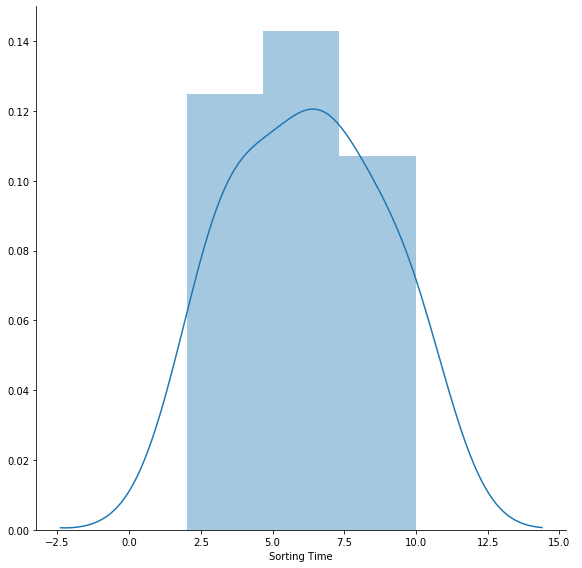

In [30]:
#visual representation of Sorting Time
g = sns.FacetGrid(delivery_df,size=8)
g.map(sns.distplot, "Sorting Time")
g.add_legend()
plt.show()

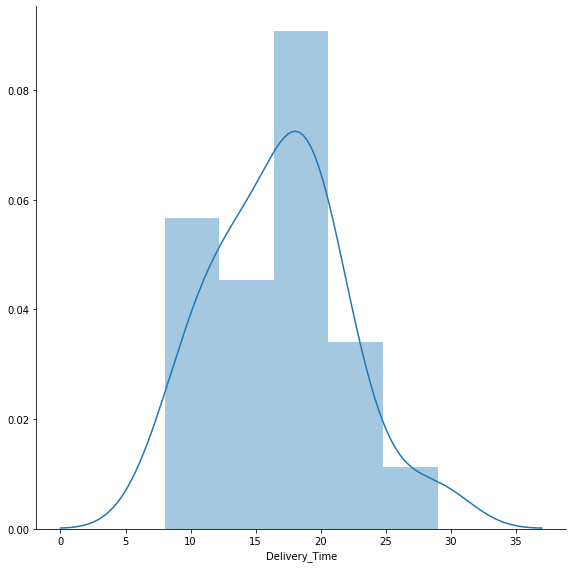

In [14]:
#visual representation of Delivery_Time
g = sns.FacetGrid(delivery_df,size=8)
g.map(sns.distplot, "Delivery_Time")
g.add_legend()
plt.show()

Text(0, 0.5, 'Delivery_Time')

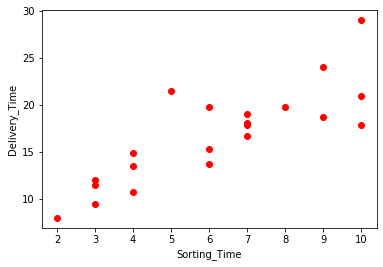

In [15]:
#scatter plot representation of Delivery time,sorting time
plt.plot(delivery_df.Sorting_Time,delivery_df.Delivery_Time,"ro"); 
plt.xlabel("Sorting_Time");
plt.ylabel("Delivery_Time")

In [16]:
#check the correlation between Calories_Consumed,Weight_gained
delivery_df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [17]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf

In [20]:
model1=smf.ols("Delivery_Time~Sorting_Time",data=delivery_df).fit()

In [22]:
type(model1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [23]:
## For getting coefficients of the varibles used in equation
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
# P-values for the variables and R-squared value for prepared model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           3.98e-06
Time:                        21:10:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#R-squared:	0.682

In [26]:
#PREDICTION
model1_pred=model1.predict(delivery_df)

In [28]:
model1_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'DELIVERY TIME')

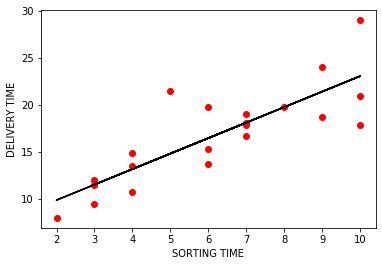

In [37]:
# Visualization of regresion line over the scatter plot of sorting_time and delivery_time
plt.scatter(x=delivery_df['Sorting_Time'],y=delivery_df['Delivery_Time'],color='red');
plt.plot(delivery_df['Sorting_Time'],model1_pred,color='black');
plt.xlabel('SORTING TIME');plt.ylabel('DELIVERY TIME')

In [38]:
#check the RMSE values
from ml_metrics import rmse
rmse(model1_pred,delivery_df.Delivery_Time)

2.7916503270617654

In [39]:
#check the correlation between predicted value and actual values
model1_pred.corr(delivery_df.Delivery_Time)

0.8259972607955325

In [40]:
#perform different transformation using better accuracy

LOGARITHMIC TRANSFORMATION

In [43]:
model2=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=delivery_df).fit()

In [44]:
# P-values for the variables and R-squared value for prepared model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           2.64e-06
Time:                        21:26:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:	0.695

In [45]:
#PREDICTION
model2_pred=model2.predict(delivery_df)

In [46]:
model2_pred

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'DELIVERY TIME')

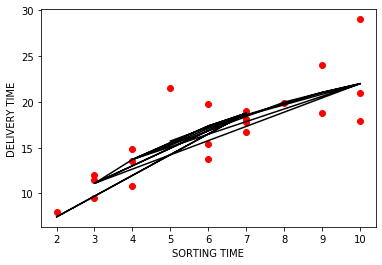

In [47]:
# Visualization of regresion line over the scatter plot of sorting_time and delivery_time
plt.scatter(x=delivery_df['Sorting_Time'],y=delivery_df['Delivery_Time'],color='red');
plt.plot(delivery_df['Sorting_Time'],model2_pred,color='black');
plt.xlabel('SORTING TIME');plt.ylabel('DELIVERY TIME')

In [48]:
#check the RMSE values

rmse(model2_pred,delivery_df.Delivery_Time)

2.733171476682066

EXPONENTIAL TRANSFORMATION

In [50]:
model3=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=delivery_df).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 24 Aug 2020   Prob (F-statistic):           1.59e-06
Time:                           21:31:59   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:	0.711

In [53]:
#PREDICTION
model3_pred=model3.predict(delivery_df)

In [55]:
model3

In [56]:
#check the RMSE values

rmse(model3_pred,delivery_df.Delivery_Time)

14.795516941016686